#                             Indian Human Image Classification Model

In [1]:
#Importing libraries
!pip install ipython-autotime
%load_ext autotime

time: 0 ns (started: 2021-04-20 11:27:12 +05:30)


# Preprocessing

In [2]:
import os
import ntpath
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage.io import imread
from skimage.transform import resize
target=[]
images=[]
flat_data=[]
DATADIR=r"D:\verzio\cropped"
CATEGORIES=[]
for entry in os.scandir(DATADIR):
    if entry.is_dir():
        CATEGORIES.append(ntpath.basename(entry.path))
for category in CATEGORIES:
  class_num=CATEGORIES.index(category)
  path=os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data=np.array(flat_data)
images=np.array(images)
target=np.array(target)

time: 7min 46s (started: 2021-04-20 11:27:12 +05:30)


In [3]:
flat_data[0]

array([0.60521569, 0.55815686, 0.61305882, ..., 0.34117647, 0.30196078,
       0.30922876])

time: 0 ns (started: 2021-04-20 11:34:59 +05:30)


In [4]:
len(target)

518

time: 0 ns (started: 2021-04-20 11:34:59 +05:30)


<BarContainer object of 2 artists>

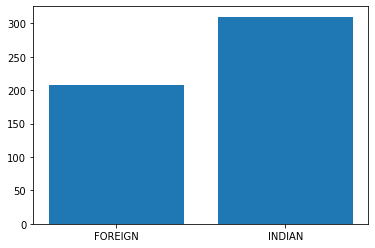

time: 110 ms (started: 2021-04-20 11:34:59 +05:30)


In [5]:
unique,count=np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

# Spliting data

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=0.2,random_state=0)
x_train,x_validation,y_train,y_validation=train_test_split(x_train,y_train,test_size=0.2)

time: 266 ms (started: 2021-04-20 11:34:59 +05:30)


In [7]:
x_train.shape

(331, 67500)

time: 0 ns (started: 2021-04-20 11:34:59 +05:30)


# Voting Ensemble Classifier

In [8]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
clf2=RandomForestClassifier(random_state=42)
clf3=GaussianNB()
clf4= DecisionTreeClassifier(random_state=42)
clf5 = KNeighborsClassifier()
clf6=SVC(gamma="scale", random_state=42,probability=True)
clf1=LogisticRegression(solver="lbfgs", random_state=42)
voting = VotingClassifier(
             estimators=[('lr', clf1),
                         ('rf', clf2),
                        ('svc', clf6),
                        ('knc',clf5),
                         ('gnb',clf3),
                         ('dtc',clf4)
                        ], 
             voting='hard',
             flatten_transform=True)

time: 110 ms (started: 2021-04-20 11:34:59 +05:30)


In [9]:
voting.fit(x_train,y_train)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42)),
                             ('knc', KNeighborsClassifier()),
                             ('gnb', GaussianNB()),
                             ('dtc', DecisionTreeClassifier(random_state=42))])

time: 1min 6s (started: 2021-04-20 11:34:59 +05:30)


In [10]:
y_pred=voting.predict(x_test)

time: 7.62 s (started: 2021-04-20 11:36:06 +05:30)


In [11]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)*100

78.84615384615384

time: 0 ns (started: 2021-04-20 11:36:13 +05:30)


In [12]:
confusion_matrix(y_test,y_pred)

array([[28, 14],
       [ 8, 54]], dtype=int64)

time: 0 ns (started: 2021-04-20 11:36:13 +05:30)


# Saving the model

In [13]:

import pickle
pickle.dump(voting,open('humanface_detection.p','wb'))

time: 2.69 s (started: 2021-04-20 11:36:13 +05:30)


In [14]:
import pickle
model=pickle.load(open('humanface_detection.p','rb'))

time: 266 ms (started: 2021-04-20 11:36:16 +05:30)


# Testing new image using URL

Enter you URLhttps://assets.thehansindia.com/h-upload/2021/04/02/1065748-sachin-tendulkar.png
(600, 1000, 3)
PREDICTION OUTPUT:INDIAN


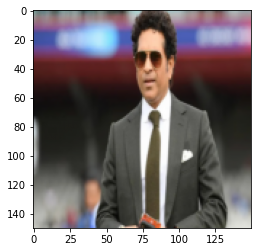

time: 3.38 s (started: 2021-04-20 12:34:07 +05:30)


In [31]:
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
flat_data=[]
url=input('Enter you URL')
img=imread(url)
img_resized=resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
y_out=CATEGORIES[y_out[0]]
print(f'PREDICTION OUTPUT:{y_out}')